In [1]:
from manage_exp import get_x0
from lin2d_exp import x_dim, sigma0, b_size, k, sigmap
from filters import Lin2d, Constructor

import matplotlib.pyplot as plt
import numpy as np
import torch

In [2]:
def log_message(message):
    print(message)
    print("-" * len(message) + "\n")

## 1- Prepare dataset for DAN

### 1.1- Linear 2d : periodic Hamiltonian dynamics

* Initialize x0 by using the function get_x0.

In [5]:
# initialize x0
# 
# Note :
# ------
# Instead of mb we can use b_size.

mb = 2 
x0 = get_x0(mb, x_dim, sigma0)

log_message("la valeur de x0 est :")
print(x0)

la valeur de x0 est :
---------------------

tensor([[2.9954, 3.0224],
        [3.0141, 3.0029]])


* Make a figure to show the dynamics of xt for t ≤ 50, staring from a random initialization
of x0. Use mb = 2 to show two simulations.

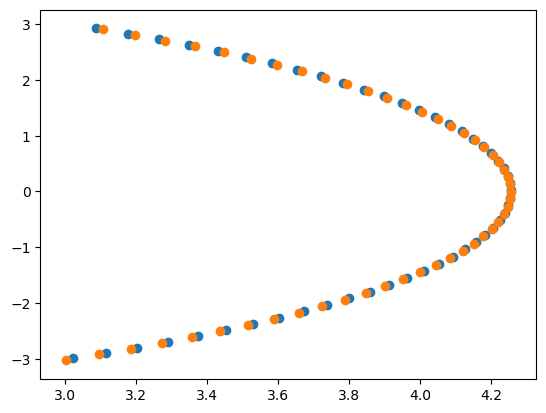

In [6]:
linear_2d = Lin2d(x_dim, 0, 0, 0)

N = 50

x = x0
x_values = torch.zeros((N, mb, x_dim))

for i in range(N):
    # store current value of x
    x_values[i] = linear_2d(x)

    # update x
    x = x_values[i]

fig = plt.figure()
for simulation_idx in range(mb):
    x_axis = x_values[:, simulation_idx, 0]
    y_axis = x_values[:, simulation_idx, 1]

    color = np.random.randint(low=0, high=255, size=3)
    plt.scatter(x_axis, y_axis)
plt.show()

### 1.2- Integration with DAN

In [7]:
propagator = Constructor(**k["prop_kwargs"])
observer = Constructor(**k["obs_kwargs"])

log_message("propagator :")
print(propagator)

print()

log_message("observer :")
print(observer)

propagator :
------------

Constructor(
  (loc): Lin2d()
  (scale_vec): Cst()
)

observer :
----------

Constructor(
  (loc): Id()
  (scale_vec): Cst()
)


* In order to generate x_t+1, you will sample a Gaussian distribution N (M . x_t, σ_p . I)

In [8]:
def generate_gaussian(mean, std):
    return torch.normal(mean, std)

I = torch.eye(x_dim)
M = propagator._modules["loc"].M 

mean = torch.matmul(M, x0)
std = sigmap * I

generate_gaussian(mean, std)

tensor([[3.0982, 3.1153],
        [2.9185, 2.9114]])

* In the linear 2d case, make a figure to show the dynamics of y_t for t ≤ 50, staring from
a random initialization of x0. Use mb = 2 to show two simulations.

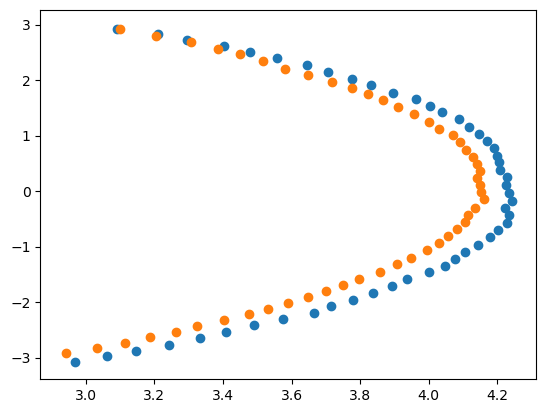

In [9]:
N = 50

x = x0

x_values = torch.zeros((N, mb, x_dim))
y_values = torch.zeros((N, mb, x_dim))

for i in range(N):
    # store current values of x and y
    x_values[i] = propagator.forward(x).sample()
    y_values[i] = observer.forward(x).sample()

    # update x and y
    x = x_values[i]


fig = plt.figure()
for simulation_idx in range(mb):
    x_axis = x_values[:, simulation_idx, 0]
    y_axis = x_values[:, simulation_idx, 1]

    color = np.random.randint(low=0, high=255, size=3)
    plt.scatter(x_axis, y_axis)
plt.show()

### 1.3- (Optional) Lorentz 40d : non-linear Chaotic dynamics

In [3]:
x0 = get_x0(2, 40, sigma0)

In [5]:
x0

tensor([[3.0190, 2.9871, 2.9981, 3.0202, 2.9918, 3.0041, 2.9798, 2.9971, 3.0021,
         2.9893, 2.9972, 3.0209, 2.9946, 2.9750, 3.0025, 2.9809, 2.9950, 3.0081,
         3.0101, 2.9934, 2.9867, 3.0154, 2.9731, 3.0033, 3.0047, 3.0061, 3.0008,
         3.0039, 3.0138, 3.0174, 2.9777, 3.0123, 3.0134, 3.0078, 3.0070, 3.0006,
         3.0045, 2.9899, 2.9929, 2.9938],
        [2.9826, 3.0138, 2.9868, 2.9831, 2.9923, 2.9827, 3.0099, 3.0064, 2.9950,
         3.0019, 2.9821, 3.0061, 3.0001, 2.9914, 2.9971, 3.0031, 3.0004, 2.9965,
         2.9876, 3.0062, 3.0038, 2.9988, 2.9963, 3.0087, 3.0157, 2.9993, 2.9996,
         3.0130, 3.0072, 3.0005, 2.9996, 3.0120, 2.9964, 2.9996, 3.0030, 3.0007,
         2.9952, 2.9897, 2.9899, 2.9944]])

In [35]:
x = torch.unsqueeze(x0, dim = 2)
x = x.repeat((1, 1, 4))

In [36]:
x

tensor([[[3.0190, 3.0190, 3.0190, 3.0190],
         [2.9871, 2.9871, 2.9871, 2.9871],
         [2.9981, 2.9981, 2.9981, 2.9981],
         [3.0202, 3.0202, 3.0202, 3.0202],
         [2.9918, 2.9918, 2.9918, 2.9918],
         [3.0041, 3.0041, 3.0041, 3.0041],
         [2.9798, 2.9798, 2.9798, 2.9798],
         [2.9971, 2.9971, 2.9971, 2.9971],
         [3.0021, 3.0021, 3.0021, 3.0021],
         [2.9893, 2.9893, 2.9893, 2.9893],
         [2.9972, 2.9972, 2.9972, 2.9972],
         [3.0209, 3.0209, 3.0209, 3.0209],
         [2.9946, 2.9946, 2.9946, 2.9946],
         [2.9750, 2.9750, 2.9750, 2.9750],
         [3.0025, 3.0025, 3.0025, 3.0025],
         [2.9809, 2.9809, 2.9809, 2.9809],
         [2.9950, 2.9950, 2.9950, 2.9950],
         [3.0081, 3.0081, 3.0081, 3.0081],
         [3.0101, 3.0101, 3.0101, 3.0101],
         [2.9934, 2.9934, 2.9934, 2.9934],
         [2.9867, 2.9867, 2.9867, 2.9867],
         [3.0154, 3.0154, 3.0154, 3.0154],
         [2.9731, 2.9731, 2.9731, 2.9731],
         [3